In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv("data/stp_lm.csv")
df.dropna(inplace=True)
df.head(5)

,Tweet,Label
0,little throwback favourite person water wall,0
1,glam yesterday kcon makeup featherette,7
2,democracy plaza wake stunning outcome decision...,11
3,amp vilo walt disney magic kingdom,0
4,galaxy far far away,2


In [49]:
 df.drop_duplicates(inplace=True)
print('after drop duplicates', df.shape)

after drop duplicates (49823, 2)


In [50]:
df['Tweet'] = df['Tweet'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
df.head(10)
df.shape

/var/folders/p6/9vz93_jn0w35pcs_knjyd76r0000gn/T/ipykernel_13295/3291048459.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweet'] = df['Tweet'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


(49823, 2)

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

c_vect = CountVectorizer()
X = c_vect.fit_transform(df['Tweet'])
#X_test = c_vect.fit_transform(X_test)
c_vect.get_feature_names_out()[110:120]

array(['abstracted', 'abstractnola', 'abswhereareyou', 'abt',
       'abtofficial', 'abtswanlake', 'abuela', 'abuelita', 'abuelito',
       'abuelos'], dtype=object)

In [53]:
#X=df["Tweet"]
y=df["Label"]

In [54]:
from sklearn.model_selection import train_test_split

#X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101, stratify=y,shuffle = True)

In [55]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=42)
X_train,y_train = os.fit_resample(X_train, y_train)

In [56]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((182120, 54353), (182120,), (7474, 54353), (7474,))

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.12229060743912229

In [58]:
knn_cv = cross_val_score(knn, X, y, cv=5)
knn_cv.mean()
knn_cv

array([0.20883091, 0.21384847, 0.22548921, 0.20634283, 0.21015656])

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict = knn.predict(X_test)
print(type(y_predict))
y_predict

<class 'numpy.ndarray'>


array([13, 12,  5, ...,  7, 12, 12])

In [60]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1607
           1       0.20      0.09      0.13       789
           2       0.31      0.16      0.21       783
           3       0.08      0.12      0.10       432
           4       0.17      0.25      0.20       377
           5       0.06      0.05      0.06       346
           6       0.05      0.11      0.07       306
           7       0.13      0.12      0.13       282
           8       0.08      0.16      0.10       268
           9       0.05      0.09      0.06       250
          10       0.07      0.08      0.08       231
          11       0.23      0.43      0.30       228
          12       0.15      0.42      0.22       219
          13       0.02      0.04      0.03       202
          14       0.05      0.04      0.05       206
          15       0.10      0.13      0.11       187
          16       0.07      0.08      0.07       196
          17       0.35    

In [61]:
import itertools
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes, normalize=True,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Doğru Etiketler')
    plt.xlabel('Tahmini Etiketler')
    plt.tight_layout()

Normalized confusion matrix


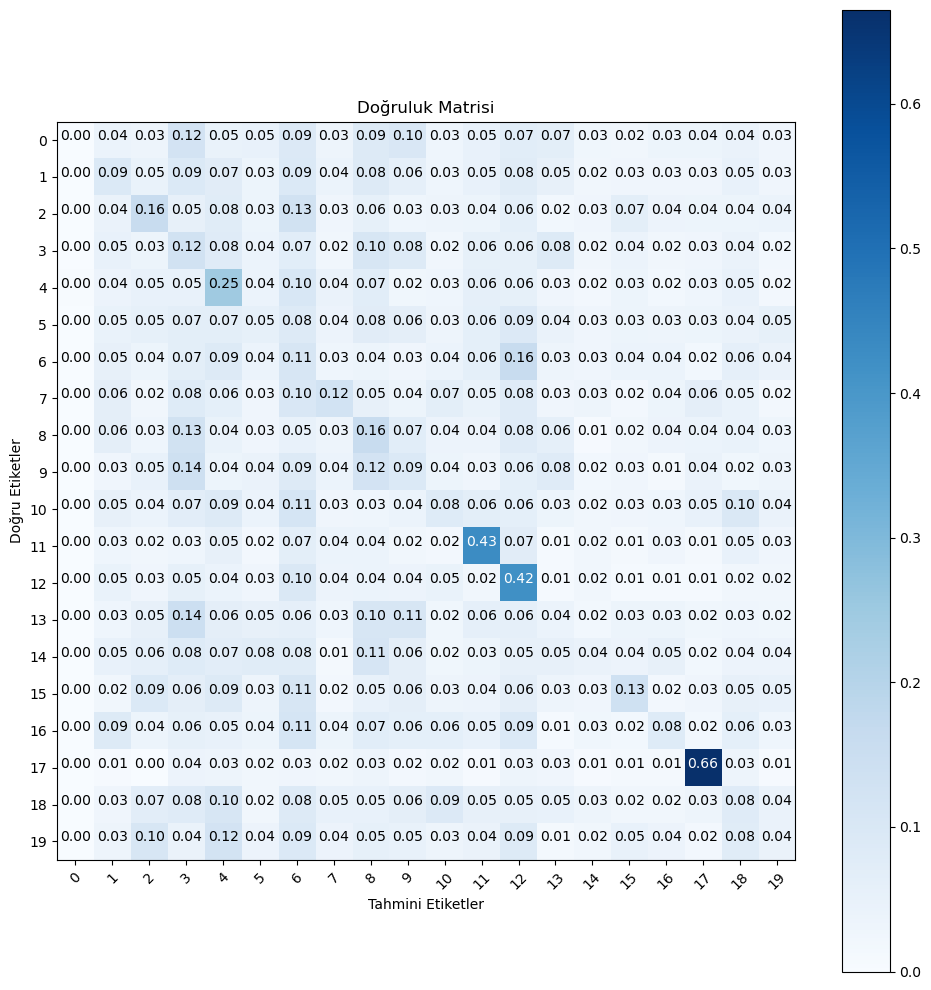

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_predict)
plot_confusion_matrix(cm, [i for i in range(20)] ,title='Doğruluk Matrisi', normalize=True)